In [21]:
##Preprossing Data
import pandas as pd
filepath = 'Datasets/owid-covid-data.csv'
df = pd.read_csv(filepath)
df.date = pd.to_datetime(df.date)
df.set_index(df.date, inplace = True)
#separando o dataset
df_mundo = df[df.location == 'World'].copy()
df_continentes = df[(df.continent.isna()) & (df.location != 'World')].copy()

In [22]:
display(df_mundo)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-02-13,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-15,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,OWID_SAM,NaN,South America,2021-07-13,34134079.0,92516.0,88302.000,1041331.0,2777.0,2613.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-14,OWID_SAM,NaN,South America,2021-07-14,34236141.0,102062.0,87423.143,1044266.0,2935.0,2594.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-15,OWID_SAM,NaN,South America,2021-07-15,34335597.0,99456.0,86232.571,1047201.0,2935.0,2549.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


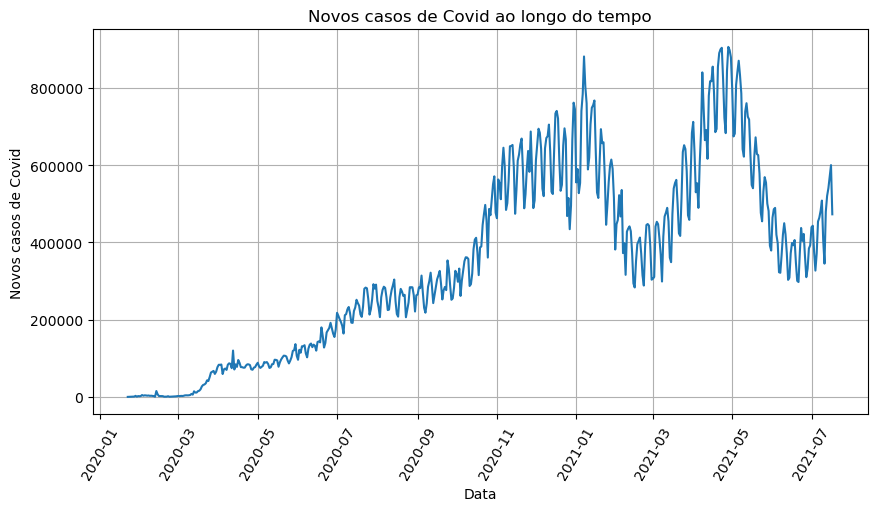

In [26]:
##Ploting Data
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot(df_mundo.date, df_mundo.new_cases)
plt.title("Novos casos de Covid ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Novos casos de Covid")
plt.xticks(rotation =60)
plt.grid(True)
plt.show()


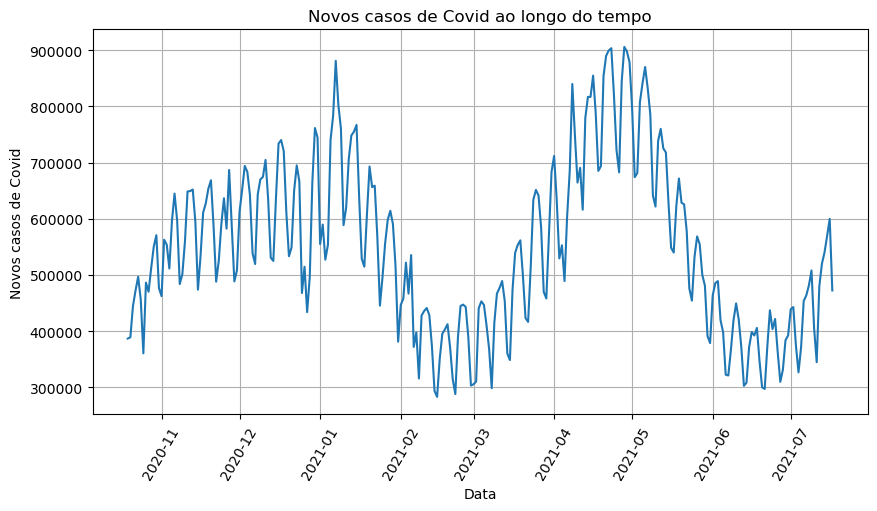

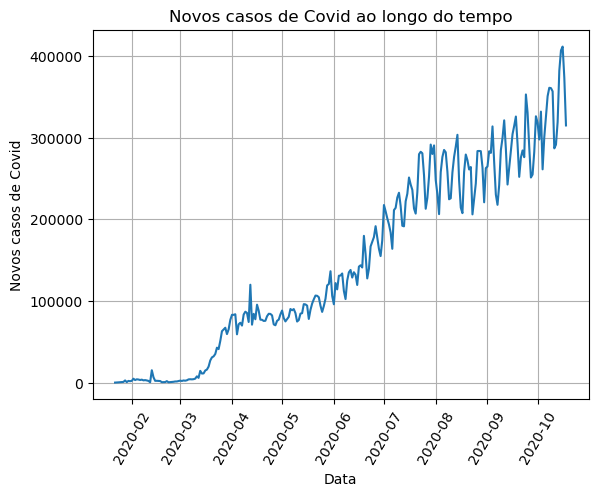

In [28]:
df_mundo05 = df_mundo[:int(len(df_mundo)*0.5)]
df_mundo510 = df_mundo[int(len(df_mundo)*0.5):]
plt.figure(figsize = (10,5))
plt.plot(df_mundo510.date, df_mundo510.new_cases)
plt.title("Novos casos de Covid ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Novos casos de Covid")
plt.xticks(rotation =60)
plt.grid(True)
plt.show()

plt.plot(df_mundo05.date, df_mundo05.new_cases)
plt.title("Novos casos de Covid ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Novos casos de Covid")
plt.xticks(rotation =60)
plt.grid(True)
plt.show()

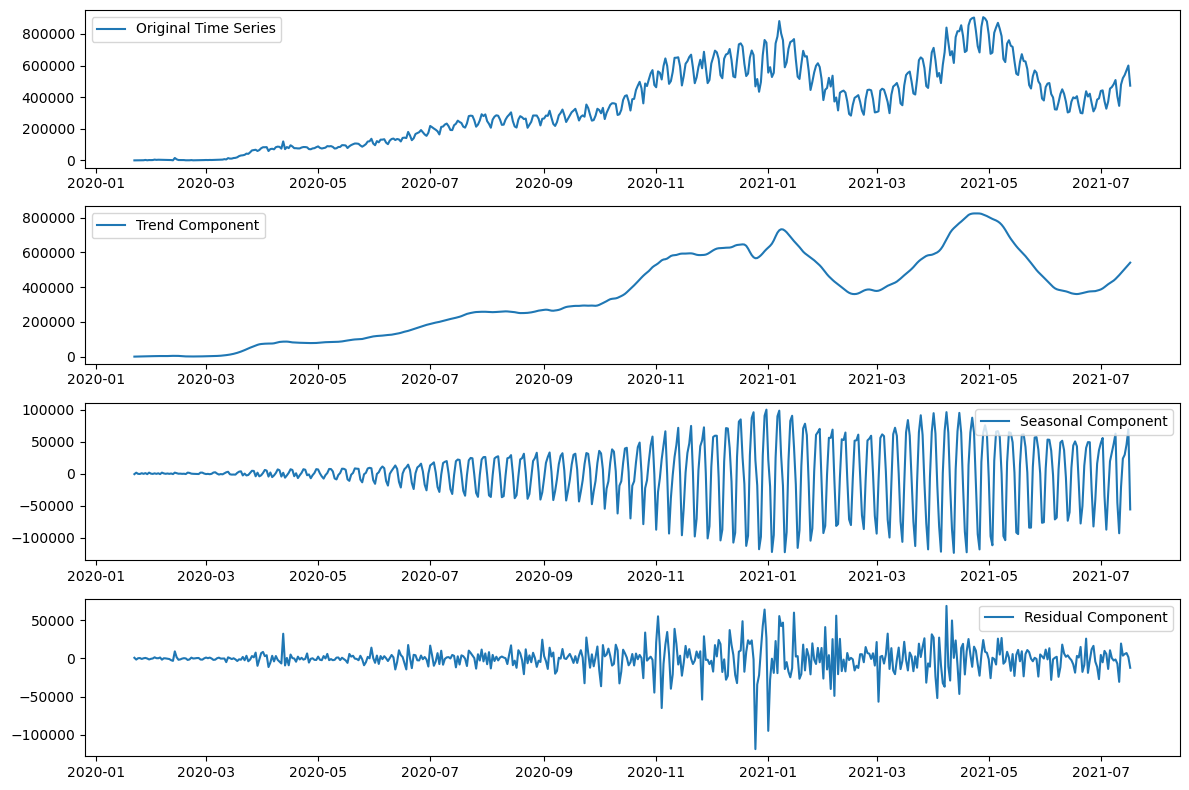

In [50]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

## DADOS COMPLETOS
# Assuming 'df' is your DataFrame with a 'value' column
stl = STL(df_mundo['new_cases'], seasonal=11) # Adjust 'seasonal' parameter based on your
result = stl.fit()
# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_mundo['new_cases'], label='Original Time Series')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend Component')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal Component')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(residual, label='Residual Component')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


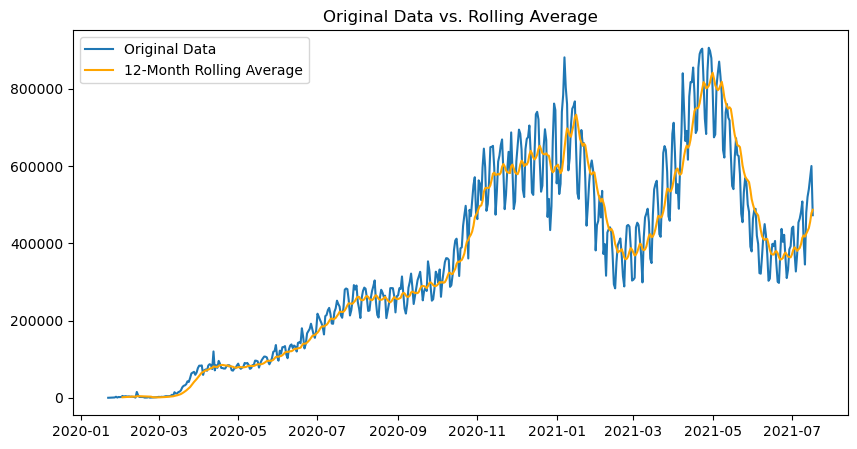

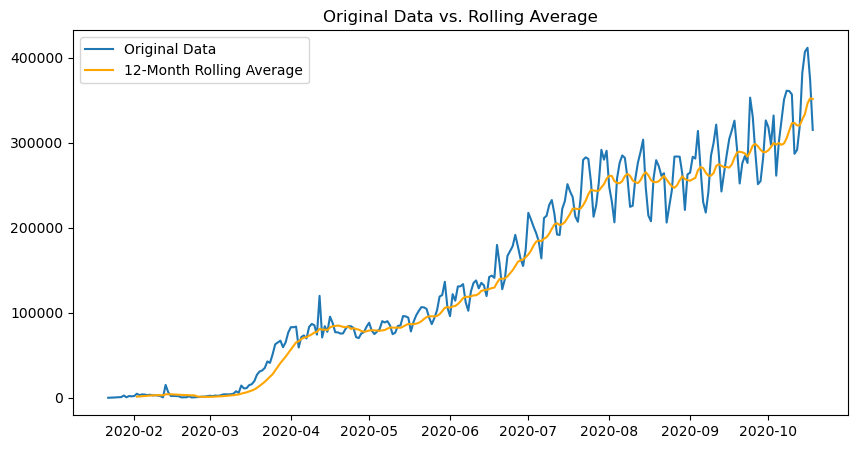

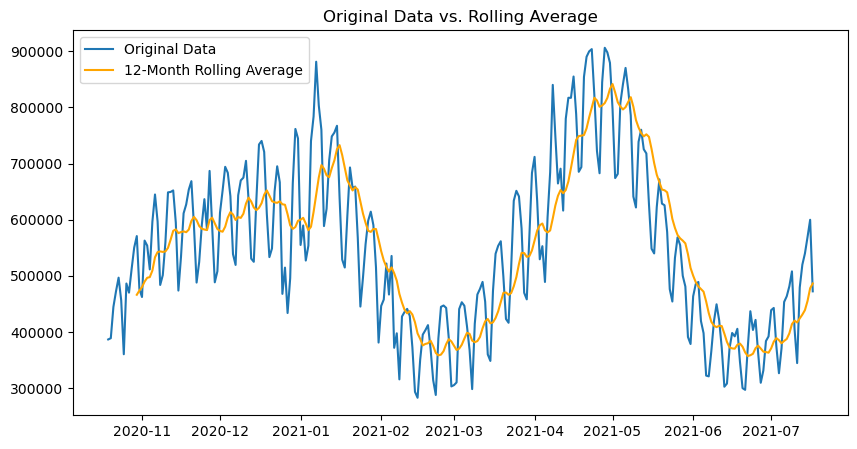

In [75]:
# Calculating a 12-month rolling average
df_mundo['new_cases_mean'] = df_mundo['new_cases'].rolling(window=12).mean()
plt.figure(figsize=(10, 5))
plt.plot(df_mundo['new_cases'], label='Original Data')
plt.plot(df_mundo['new_cases_mean'], label='12-Month Rolling Average', color='orange')
plt.title('Original Data vs. Rolling Average')
plt.legend()
plt.show()

#df_mundo05['new_cases_mean'] = df_mundo05['new_cases'].rolling(window=12).mean()
plt.figure(figsize=(10, 5))
plt.plot(df_mundo05['new_cases'], label='Original Data')
plt.plot(df_mundo05['new_cases_mean'], label='12-Month Rolling Average', color='orange')
plt.title('Original Data vs. Rolling Average')
plt.legend()
plt.show()

#df_mundo510['new_cases_mean'] = df_mundo510['new_cases'].rolling(window=12).mean()
plt.figure(figsize=(10, 5))
plt.plot(df_mundo510['new_cases'], label='Original Data')
plt.plot(df_mundo510['new_cases_mean'], label='12-Month Rolling Average', color='orange')
plt.title('Original Data vs. Rolling Average')
plt.legend()
plt.show()

In [76]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    return result[1] # Return the p-value

p_value = check_stationarity(df_mundo['new_cases'])
if p_value <= 0.05:
    print(f" The series 'new_cases' is likely stationary")
else:
    print(f" The series 'new_cases' is likely non-stationary")
print(p_value)

 The series 'new_cases' is likely non-stationary
0.37477679876812103


In [77]:
p_value = check_stationarity(df_mundo05['new_cases'])
if p_value <= 0.05:
    print(f" The series 'new_cases' is likely stationary")
else:
    print(f" The series 'new_cases' is likely non-stationary")
print(p_value)

 The series 'new_cases' is likely non-stationary
0.9891579986638807


In [80]:
p_value = check_stationarity(df_mundo510['new_cases'])
if p_value <= 0.05:
    print(f" The series 'new_cases' is likely stationary")
else:
    print(f" The series 'new_cases' is likely non-stationary")
print(p_value)

 The series 'new_cases' is likely non-stationary
0.12173245206253758


In [87]:
from numpy import log
df_mundo['new_cases_diff'] = df_mundo['new_cases'].diff()
df_mundo['new_cases_log'] = log(df_mundo['new_cases'])

/usr/lib/python3/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [88]:
p_value = check_stationarity(df_mundo['new_cases_diff'].dropna())
if p_value <= 0.05:
     print(f" The series 'new_cases' is likely stationary")
else:
    print(f" The series 'new_cases' is likely non-stationary")
print(p_value)

 The series 'new_cases' is likely stationary
3.319956073886172e-05


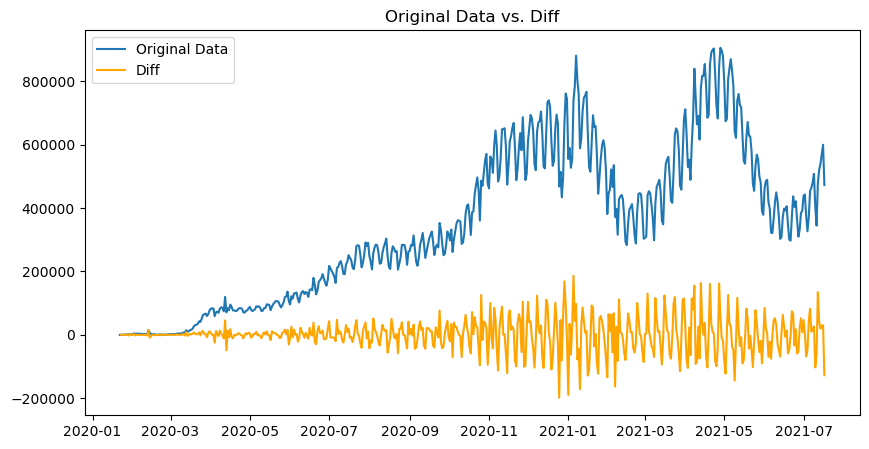

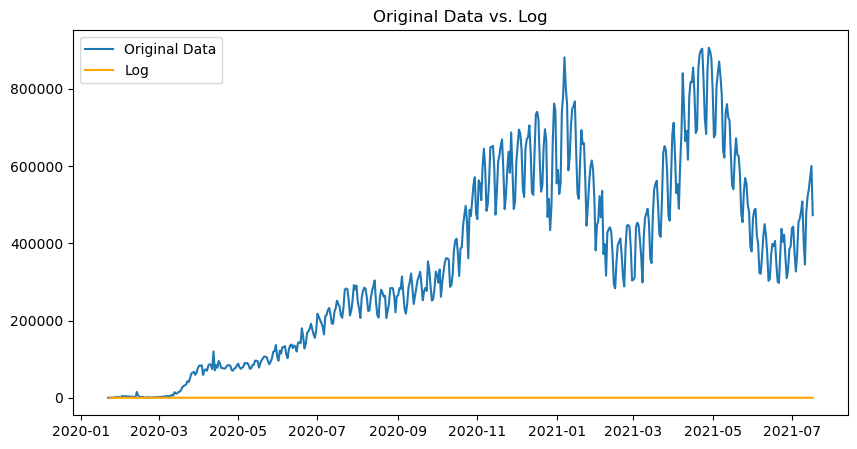

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(df_mundo['new_cases'], label='Original Data')
plt.plot(df_mundo['new_cases_diff'], label='Diff', color='orange')
plt.title('Original Data vs. Diff')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_mundo['new_cases'], label='Original Data')
plt.plot(df_mundo['new_cases_log'], label='Log', color='orange')
plt.title('Original Data vs. Log')
plt.legend()
plt.show()